In [1]:
import pandas as pd
import numpy as np

In [20]:
#converting txt to csv
read_file = pd.read_csv('HURDAT2.txt')
read_file.to_csv('HURDAT2.csv')
df = read_file.iloc[:,:-1]
df.columns=["Date","Time","Event","Status","Latitude","Longitude","Maximum Wind","Minimum Pressure","Low Wind NE","Low Wind SE","Low Wind SW","Low Wind NW","Moderate Wind NE","Moderate Wind SE","Moderate Wind SW","Moderate Wind NW","High Wind NE","High Wind SE","High Wind SW","High Wind NW"]
df = df.dropna(axis=0)
df = df[df.iloc[:,10]!=-999]
df.head()

C:\Users\qxh3161\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
45160,20040731,1800,,TD,30.3N,78.3W,25.0,1010.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45161,20040801,0000,,TD,31.0N,78.8W,25.0,1009.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45162,20040801,0600,,TD,31.5N,79.0W,25.0,1009.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45163,20040801,1200,,TD,31.6N,79.1W,30.0,1009.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45164,20040801,1800,,TS,31.6N,79.2W,35.0,1009.0,0.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# remoivng North and West
df['Latitude'] = df.iloc[:,4].str.replace('[a-zA-Z]','')
df['Longitude'] = df.iloc[:,5].str.replace('[a-zA-Z]','')

In [98]:
def is_real_and_finite(x):
    if not np.isreal(x):
        return False
    elif not np.isfinite(x):
        return False
    else:
        return True

all_data = df[df.columns[2:]].values #dropping first 4 columns
numeric_map = df[df.columns[1:]].applymap(is_real_and_finite)
X = np.array(all_data)
print(X.shape)

(9101, 18)


In [76]:
x_string = [str(name) for name in df.columns[2:20]]
print(x_string)

['Event', 'Status', 'Latitude', 'Longitude', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']


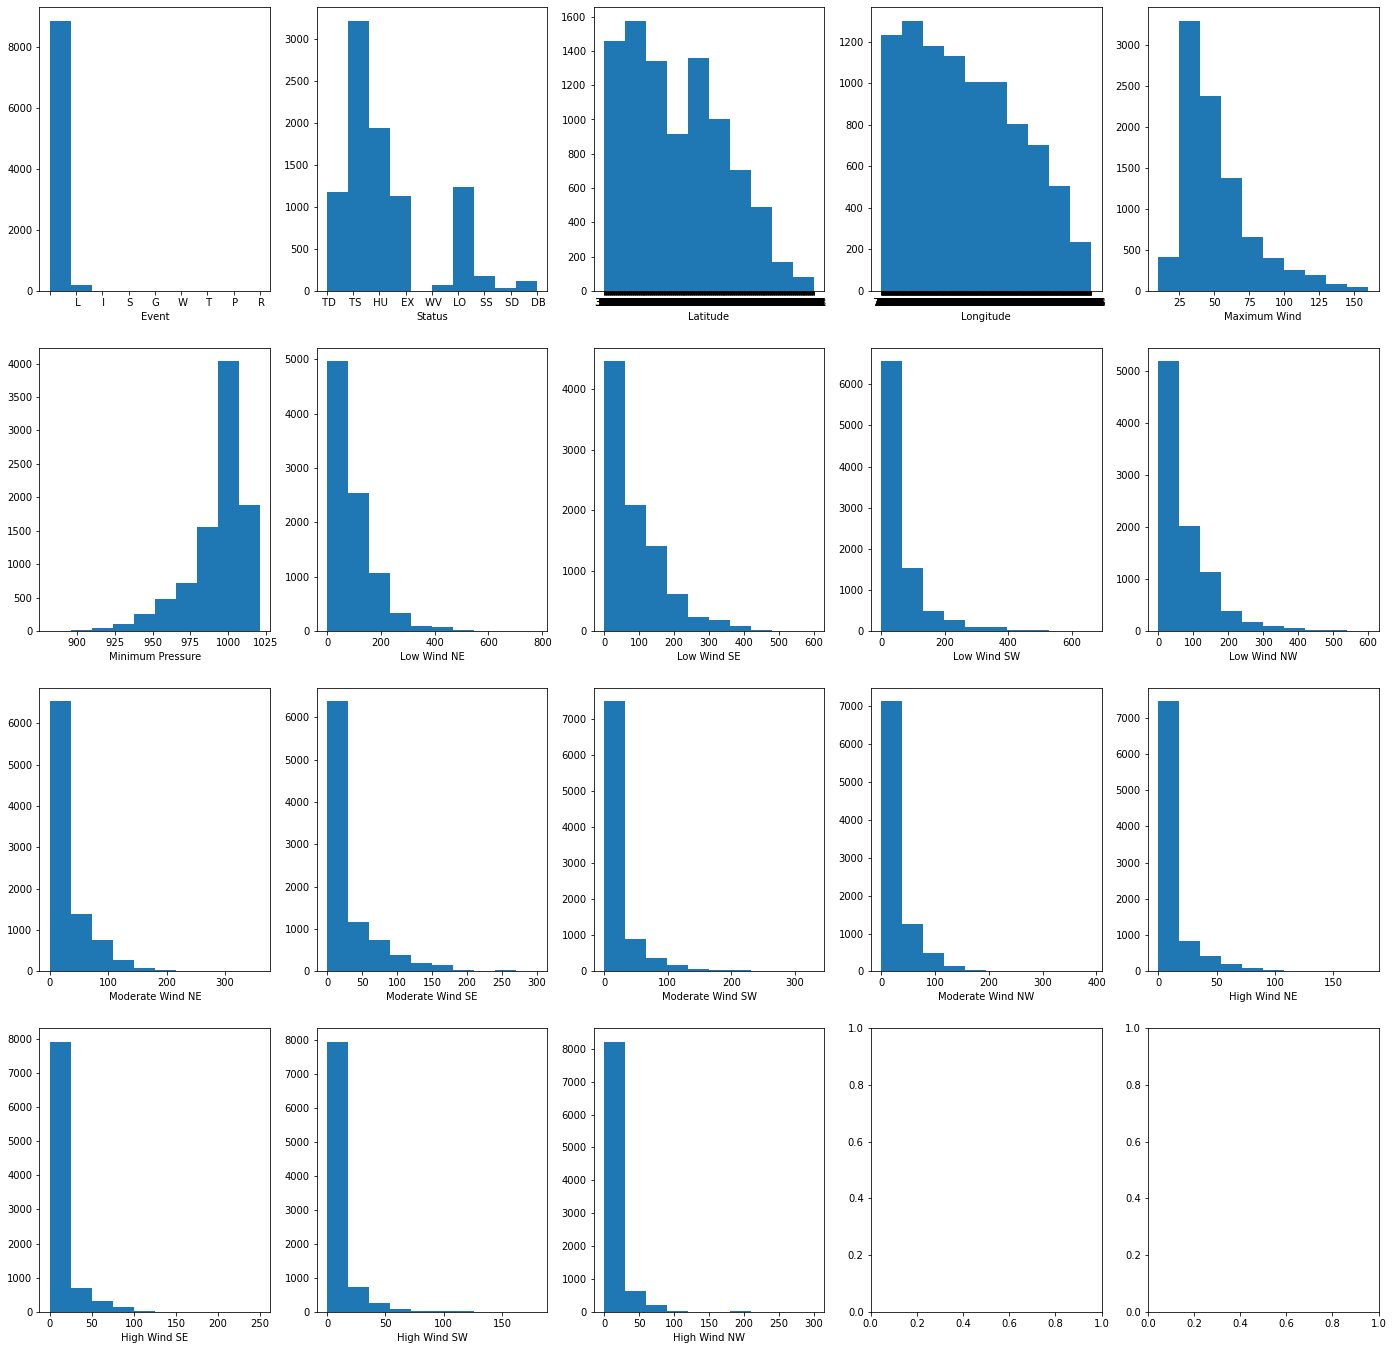

In [78]:
#visualizing of features
import matplotlib.pyplot as plt

N = X.shape[-1]
n = int(np.sqrt(N))
fig, axes = plt.subplots(n, n+1, figsize=(6*n, 6*n))
ax = axes.ravel()
for i in range(N):
    ax[i].hist(X[:,i])
    ax[i].set_xlabel(x_string[i])

In [115]:
len(x_string[2:])

16

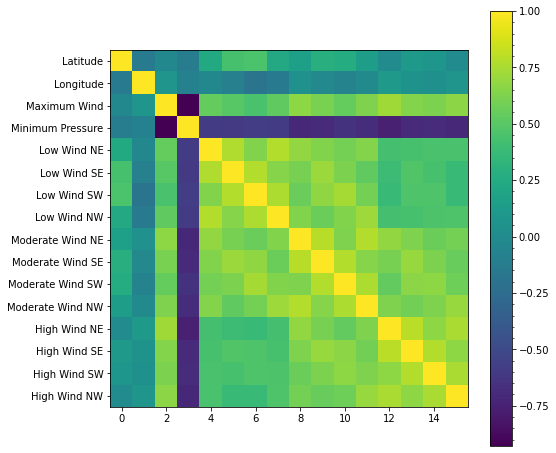

In [136]:
#check correlation numerical features
X_float = X[:,2:]
X_float = X_float.astype(np.float)
X_scaled = (X_float-X_float.mean(axis=0))/X_float.std(axis=0)
co_var = np.cov(X_scaled.T)

fig, ax = plt.subplots(figsize=(8,8))
ax.set_yticks(np.arange(len(x_string[2:])))
ax.set_yticklabels(x_string[2:])
c = ax.imshow(co_var)
cbar = fig.colorbar(c)
cbar.minorticks_on();